In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loans.csv')
df.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


In [3]:
X = df.drop('safe_loans', axis=1)
y = df.safe_loans

In [4]:
from sklearn.preprocessing import LabelEncoder 
from collections import defaultdict 
d = defaultdict(LabelEncoder) 
X_trans = X.apply(lambda x: d[x.name].fit_transform(x)) 
X_trans.head()


,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,2,13,1,1,3,97,0,1,1,1,107,0
1,5,26,0,5,2,552,9,1,1,1,349,0
2,1,9,1,1,3,1805,8,1,1,1,388,0
3,2,10,1,1,3,1005,2,0,1,1,952,0
4,1,6,0,4,3,703,8,0,1,1,583,0


In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state=1)

D:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train.shape

(34881, 12)

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

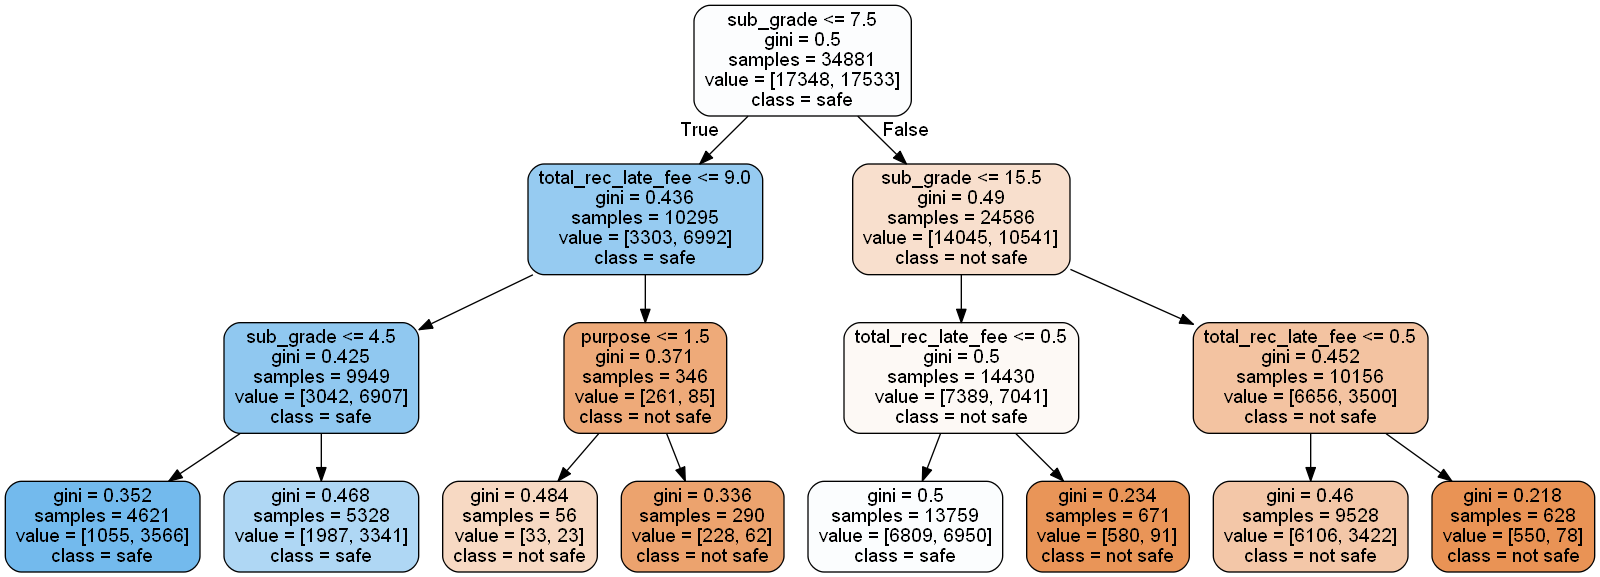

In [8]:
with open("safe-loans.dot", 'w') as f: 
    f = tree.export_graphviz(clf, 
                             out_file=f, 
                             max_depth = 3, 
                             impurity = True, 
                             feature_names = list(X_train), 
                             class_names = ['not safe', 'safe'], 
                             rounded = True, 
                             filled= True ) 
from subprocess import check_call
import subprocess
output = None
try:
    output = check_call(['‪‪dot','-Tpng','safe-loans.dot','-o','safe-loans.png'],shell=True) 
except subprocess.CalledProcessError as e:
    output = e.output

from IPython.display import Image as PImage 
from PIL import Image, ImageDraw, ImageFont 
img = Image.open("safe-loans.png") 
draw = ImageDraw.Draw(img) 
img.save('output.png') 
PImage("output.png")
